# Kishazi no. 1 

#### 1. Python/LUA nyelven olvass be öt darab tetszőleges 128x128 pixeles színes képet, jelenítsd meg és írd ki az RGB csatornáit tartalmazó tömbök (mátrixok, tensorok) tartalmát.

In [1]:
from numpy import asarray
import imageio
import statistics 
import numpy

from sklearn.preprocessing import StandardScaler
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile
import urllib.request
from bs4 import BeautifulSoup
import re
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt



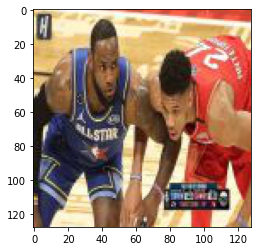

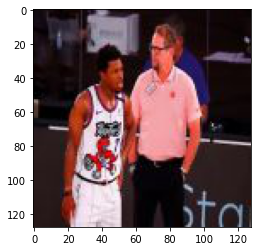

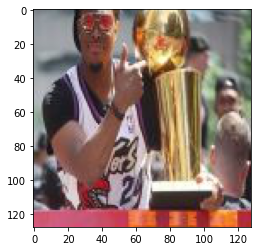

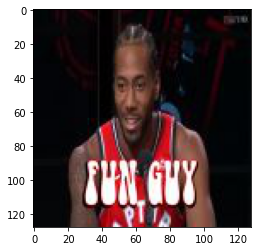

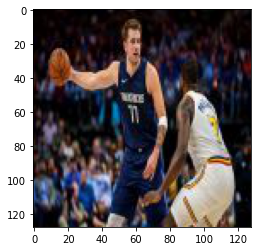

In [2]:
# read all 5 images
image1=imageio.imread(r"C:\Users\Adam\Downloads\giannis_lebron.jpg")
image2=imageio.imread(r"C:\Users\Adam\Downloads\nurse.jpg")
image3=imageio.imread(r"C:\Users\Adam\Downloads\kyle_lowry.jpg")
image4=imageio.imread(r"C:\Users\Adam\Downloads\kawhi_fun.jpg")
image5=imageio.imread(r"C:\Users\Adam\Downloads\doncic.jpg")
# make an array for the images
images = [] 
#add every image to it 
images.extend([image1,image2,image3,image4,image5])
#show the images
for i in images:
    plt.imshow(i)
    plt.show()

In [3]:
def print_arrays(images):
    for i in images: 
        print(i)
    
print_arrays(images)

[[[255 216 139]
  [255 231 169]
  [255 222 179]
  ...
  [213  71  47]
  [209  69  42]
  [208  70  41]]

 [[245 202 123]
  [255 215 151]
  [252 215 171]
  ...
  [196  68  43]
  [193  68  40]
  [192  69  38]]

 [[210 177  96]
  [223 192 128]
  [207 179 139]
  ...
  [197  77  53]
  [196  78  52]
  [195  80  51]]

 ...

 [[155  94  75]
  [145  91  67]
  [131  88  56]
  ...
  [160 130 106]
  [206 173 120]
  [221 187 113]]

 [[156  93  76]
  [153  97  72]
  [130  85  52]
  ...
  [162 133 127]
  [209 181 133]
  [219 192 111]]

 [[158  92  76]
  [159 101  77]
  [128  83  50]
  ...
  [158 132 135]
  [198 171 126]
  [216 191 109]]]
[[[16 10 12]
  [17 11 13]
  [19 13 15]
  ...
  [ 8  2  2]
  [ 6  2  1]
  [ 6  2  1]]

 [[16 10 14]
  [17 11 15]
  [18 12 16]
  ...
  [10  4  4]
  [ 9  5  4]
  [ 8  4  3]]

 [[16 10 14]
  [18 12 16]
  [18 12 16]
  ...
  [11  5  5]
  [11  5  5]
  [10  6  5]]

 ...

 [[39 25 25]
  [39 25 25]
  [39 25 25]
  ...
  [31 29 34]
  [32 23 24]
  [82 72 71]]

 [[39 25 25]
  [39 2

### 2. Csatornánként számold ki az egyes pixelek átlagát és szórását az öt képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását.

In [4]:
#DISCLAIMER: The wording of the task was somewhat confusing to me, but as I understood my objective is to calculate the mean 
#            and the standard deviation for all the images TOGETHER.  (instead of calculating it separately on each image). 


In [5]:
#returns the 3 channels (red,green,blue) of an image 
def image_chanel_adder(red,green,blue,data):
    img_red=data[:,:,0]  #the red channel
    img_red=img_red.ravel() #flattens the array to 1d 
    img_green=data[:,:,1]  #the green channel 
    img_green=img_green.ravel() #flattens the array to 1d 
    img_blue=data[:,:,2]   #the blue channel 
    img_blue=img_blue.ravel() #flattens the array to 1d 
    
    red = numpy.append(red,img_red)      #append the red channel of the image to the given parameter 
    green = numpy.append(red,img_green)  #append the green channel of the image to the given parameter 
    blue = numpy.append(red,img_blue)    #append the blue channel of the image to the given parameter 
    return red, green, blue
    
#calculates the mean and standard deviation of the 3 channels     
def mean_and_std(red,green,blue):
    print("Red channel mean: " + str(red.mean()) + ", stanard deviation: " + str(numpy.std(red)))
    print("Green channel mean: " + str(green.mean()) + ", stanard deviation: " + str(numpy.std(green)))
    print("Blue channel mean: " + str(blue.mean()) + ", stanard deviation: " + str(numpy.std(blue)))

In [6]:

#lets create 3 empty arrays
red = numpy.array([]) 
green = numpy.array([])
blue = numpy.array([])

#make 3 channels from the 5 images 
red,green,blue = image_chanel_adder(red,green,blue,image1)
red,green,blue = image_chanel_adder(red,green,blue,image2)
red,green,blue = image_chanel_adder(red,green,blue,image3)
red,green,blue = image_chanel_adder(red,green,blue,image4)
red,green,blue = image_chanel_adder(red,green,blue,image5)

# I use the StandardScaler function, but it could be easily done by creating a new function. 
# The idea behind StandardScaler is that it will transform your data such that its distribution 
# will have a mean value 0 and standard deviation of 1.
def standardscaler(red,green,blue):
    scaler = StandardScaler()
    red = scaler.fit_transform(red.reshape(-1,1))
    green = scaler.fit_transform(green.reshape(-1,1))
    blue = scaler.fit_transform(blue.reshape(-1,1))
    return red, green, blue

#transform the channels 
red,green,blue = standardscaler(red,green,blue)
#print out the mean and std deviation
mean_and_std(red,green,blue)

Red channel mean: 3.8857805861880476e-17, stanard deviation: 1.0000000000000002
Green channel mean: 4.625929269271485e-18, stanard deviation: 0.9999999999999998
Blue channel mean: 5.782411586589357e-17, stanard deviation: 1.0


### 3. Python/LUA nyelven olvass be egy tetszőleges hangfájlt és jelenítsd meg a spektrogramját.


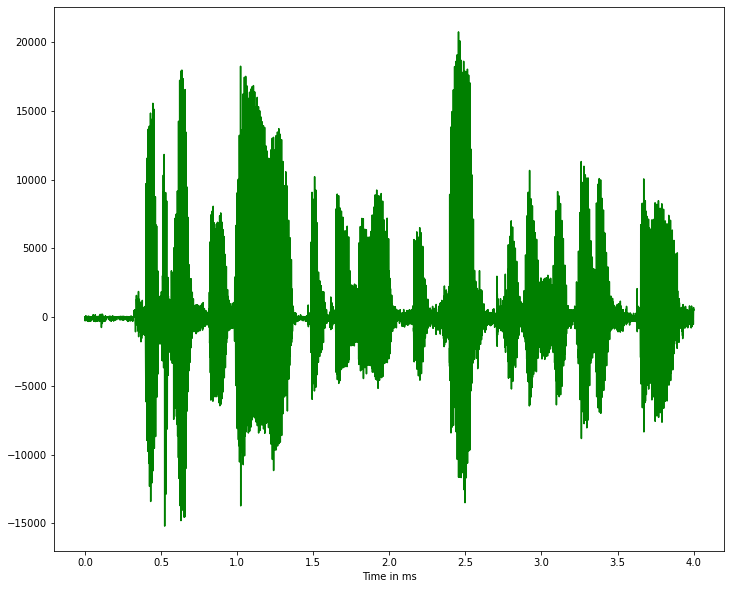

In [7]:
#read the wav file -> returns a sample rate(48000 and the data)
sample_rate, data = scipy.io.wavfile.read(r'C:\Users\Adam\Downloads\h_orig.wav')

#make it float so that we can divide.
#end is the length of the file 
sample_rate = float(sample_rate)
end = data.shape[0] / sample_rate   

#spreads out the data evenly spaced
timeArray = numpy.linspace(0., end , data.shape[0])

#plot for visualization 
plt.figure(figsize=(12,10)) #make plot bigger
plt.plot(timeArray, data, color='g') 
plt.xlabel('Time in ms')
plt.show()

### 4. Python/LUA scriptből töltsd le a https://en.wikipedia.org/wiki/Deep_learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát.

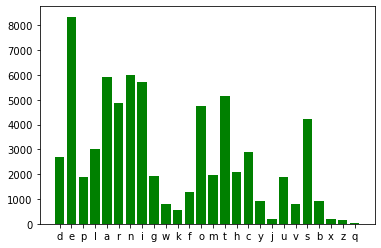

In [8]:
# read url into html, read it with beautifulsoup
url = "https://en.wikipedia.org/wiki/Deep_learning"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# kill all script and style elements, so that the plain text is the only thing there
for script in soup(["script", "style"]):
    script.extract()    

# get text, make it lowercase, only keep letters 
text = soup.get_text()
text= text.lower()
text = re.sub(r'[^a-z]+', '', text)

#counts how many times a letter occurs with a Counter object
count = Counter(text)

# plot the values and show the plot (visualize)
plt.bar(count.keys(), count.values(), color='g')  
plt.show() 